<a href="https://colab.research.google.com/github/Faizanealiqazi/HousePricePrediction/blob/main/House_Price_Prediction_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir("/content/drive/MyDrive")

In [64]:
import pandas as pd

train_data = pd.read_csv("hpp_train.csv", index_col=False) #house price prediction data from kaggle
test_data = pd.read_csv("hpp_test.csv", index_col=False)
sample_submission = pd.read_csv("hpp_sample_submission.csv")

In [65]:
print(sample_submission)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]


In [66]:
print(train_data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [67]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
# Drop the 'Id' column
train_data.drop(columns='Id', inplace=True)

In [69]:
print("Columns with null values: ",train_data.isnull().sum())
null_columns = train_data.columns[train_data.isnull().sum() > 0]
print("Columns with null values:", null_columns)
print("No of columns with null values:", len(null_columns))

Columns with null values:  MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
Columns with null values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
No of columns with null values: 19


-1105.0 791005.0


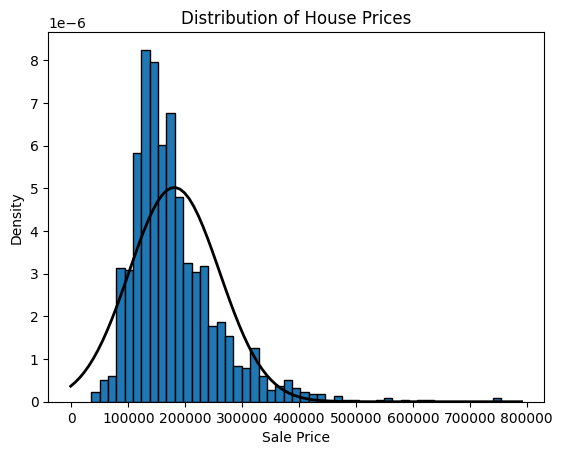

In [71]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Get mean and standard deviation of SalePrice
mean_price = train_data['SalePrice'].mean()
std_price = train_data['SalePrice'].std()

# Create histogram
plt.hist(train_data['SalePrice'], bins='auto', density=True, edgecolor='black')

# Add normal distribution curve
xmin, xmax = plt.xlim()
print(xmin, xmax)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_price, std_price)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of House Prices')

# Show plot
plt.show()

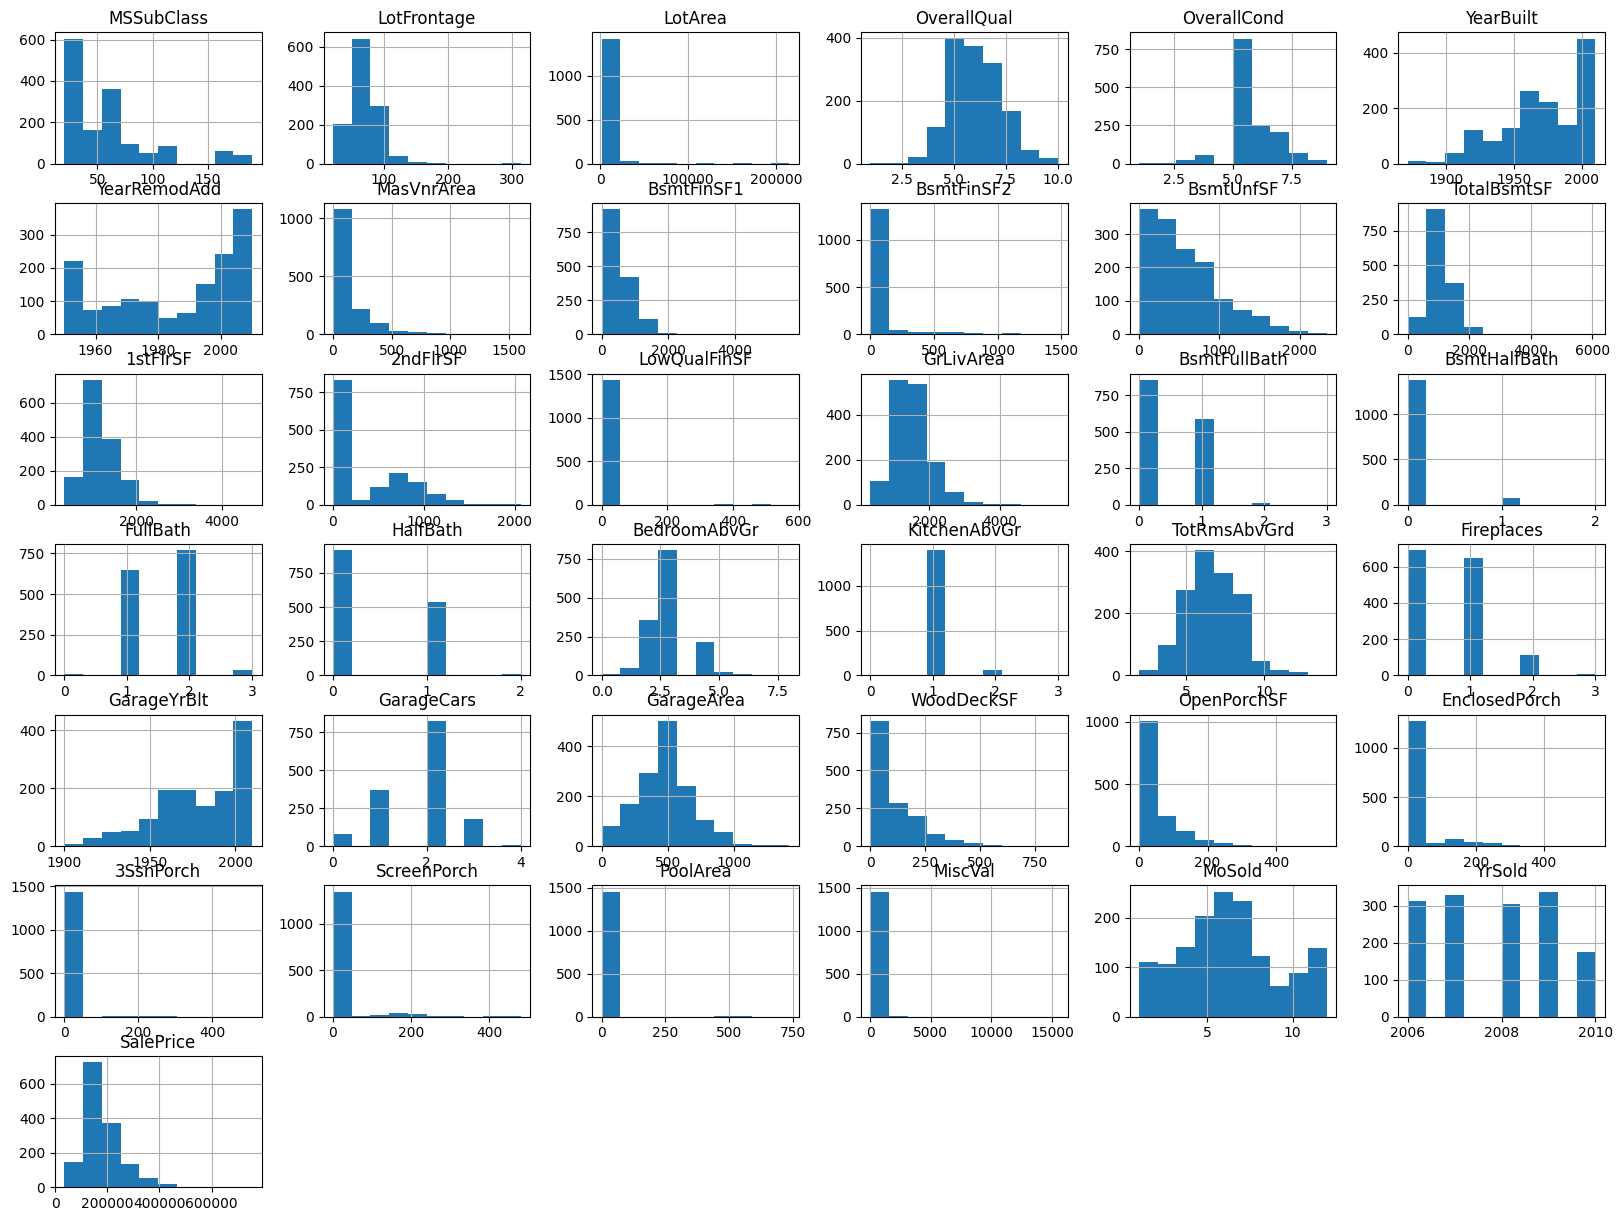

In [72]:
#Plotting histogram to see daa distributino for each column
train_data.hist(figsize = (20,15))
plt.show()

In [73]:
# Select columns with categorical data
categorical_columns = train_data.select_dtypes(include=['object']).columns

# Print columns with categorical data
print("Columns with categorical data:", categorical_columns)
train_data[categorical_columns]

Columns with categorical data: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [74]:
# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values for Street: ['Pave' 'Grvl']
Unique values for Alley: [nan 'Grvl' 'Pave']
Unique values for LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Unique values for LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values for Utilities: ['AllPub' 'NoSeWa']
Unique values for LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values for LandSlope: ['Gtl' 'Mod' 'Sev']
Unique values for Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values for Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values for Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values for BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values for HouseStyle: ['2S

In [75]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column and replace values with numerical labels
for column in categorical_columns:
    # Fill NaN values with a placeholder
    train_data[column].fillna("NaN", inplace=True)

    # Encode the categorical values
    train_data[column] = label_encoder.fit_transform(train_data[column])

# Print the updated dataframe
print(train_data[categorical_columns])

      MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0            3       1      1         3            3          0          4   
1            3       1      1         3            3          0          2   
2            3       1      1         0            3          0          4   
3            3       1      1         0            3          0          0   
4            3       1      1         0            3          0          2   
...        ...     ...    ...       ...          ...        ...        ...   
1455         3       1      1         3            3          0          4   
1456         3       1      1         3            3          0          4   
1457         3       1      1         3            3          0          4   
1458         3       1      1         3            3          0          4   
1459         3       1      1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  ...  GarageType  Gar

In [76]:
# Print unique values for each column
for column in train_data.columns:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values for MSZoning: [3 4 0 1 2]
Unique values for LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values for LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values for Street: [1 0]
Unique values for Alley: [1 0 2]
Unique values for LotShape: [3 0 1 2]
Unique values for LandContour: [3 0 2 1]
Unique values for Utilities: [0 1]
Unique values for LotConf

In [77]:
null_columns = train_data.columns[train_data.isnull().sum() > 0]
print("Columns with null values:", null_columns)
print("No of columns with null values:", len(null_columns))
print(train_data[null_columns])

# Print unique values for each column
for column in train_data[null_columns]:
    unique_values = train_data[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Columns with null values: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
No of columns with null values: 3
      LotFrontage  MasVnrArea  GarageYrBlt
0            65.0       196.0       2003.0
1            80.0         0.0       1976.0
2            68.0       162.0       2001.0
3            60.0         0.0       1998.0
4            84.0       350.0       2000.0
...           ...         ...          ...
1455         62.0         0.0       1999.0
1456         85.0       119.0       1978.0
1457         66.0         0.0       1941.0
1458         68.0         0.0       1950.0
1459         75.0         0.0       1965.0

[1460 rows x 3 columns]
Unique values for LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 

In [78]:
# Count the number of records where all specified columns are null
num_null_records = train_data[null_columns].isnull().any(axis=1).sum()

for column in null_columns:
    num_null_in_column = train_data[column].isnull().sum()
    print(f"Number of null values in {column}: {num_null_in_column}")

print("Number of records where any of specified column has null value :", num_null_records)

Number of null values in LotFrontage: 259
Number of null values in MasVnrArea: 8
Number of null values in GarageYrBlt: 81
Number of records where any of specified column has null value : 339


In [79]:
train_data.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.035900,-0.386347,-0.139781,-0.024969,0.099430,0.119289,-0.002940,-0.022844,0.075910,...,0.008283,-0.005221,0.086360,-0.046881,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,0.035900,1.000000,-0.111690,-0.034452,0.087654,-0.368086,0.061887,-0.017854,-0.001192,-0.009895,...,-0.003128,0.002882,-0.061289,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.386347,-0.111690,1.000000,0.426095,-0.040886,-0.066880,-0.169641,-0.080757,NaN,-0.208276,...,0.206167,-0.195051,-0.040862,0.010689,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.139781,-0.034452,0.426095,1.000000,-0.197131,-0.029676,-0.165315,-0.149083,0.010123,-0.121161,...,0.077672,-0.065167,0.036031,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.040886,-0.197131,1.000000,-0.001587,-0.010224,0.115995,0.001682,0.013960,...,0.004413,-0.004067,-0.029386,-0.160748,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.011200,0.001205,0.003690,-0.011274,-0.033455,-0.011599,-0.051552,0.018902,...,-0.033737,0.036368,-0.009892,0.013957,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.007450,-0.014261,-0.025043,0.015176,0.036449,0.020507,0.023353,-0.005992,...,-0.059689,0.060904,-0.035366,0.057708,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.034559,0.012292,0.014339,0.001092,-0.000911,-0.025754,-0.126770,0.014325,...,0.011009,-0.013592,-0.006154,-0.003340,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.063372,0.034169,0.006064,-0.000162,-0.038118,0.033809,-0.089701,0.051579,...,-0.067251,0.097425,0.100675,-0.008074,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


In [80]:
#Handling missing values in LotFrontage
train_data.LotFrontage.fillna(train_data.LotFrontage.median(), inplace=True)
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data.groupby(["Neighborhood","LotShape"])["LotFrontage"].transform("median"))

In [81]:
print("Null data in LotFrontage: ",train_data["LotFrontage"].isnull().sum())

Null data in LotFrontage:  0


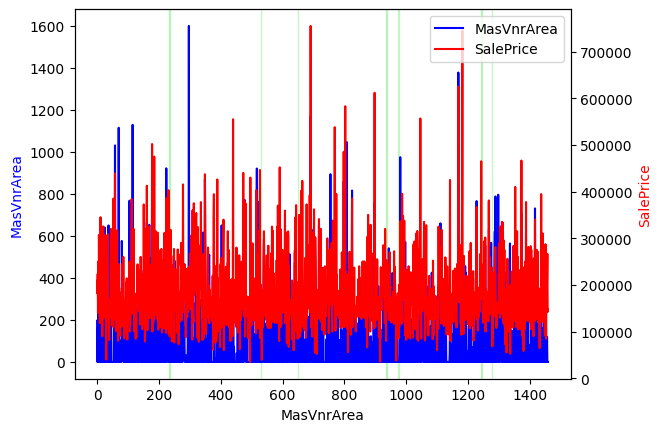

In [82]:
#Handling missing values in MasVnrArea
fig, ax = plt.subplots()

# Plot 'MasVnrArea' on the first y-axis
ax.plot(train_data['MasVnrArea'], label='MasVnrArea', color='blue')
ax.set_xlabel('MasVnrArea')
ax.set_ylabel('MasVnrArea', color='blue')

# Create a second y-axis and plot 'SalePrice' on it
ax2 = ax.twinx()
ax2.plot(train_data['SalePrice'], label='SalePrice', color='red')
ax2.set_ylabel('SalePrice', color='red')

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Highlight each null value with a green background
null_indices = train_data['MasVnrArea'].isnull()
for i, is_null in enumerate(null_indices):
    if is_null:
        ax.axvspan(i, i + 1, color='lightgreen', alpha=0.5)

plt.show()

In [83]:
#Filling null values in MasVnrArea with zero
train_data.MasVnrArea.fillna(0, inplace=True)

In [84]:
print("Null data in LotFrontage: ",train_data["MasVnrArea"].isnull().sum())

Null data in LotFrontage:  0


In [85]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']

# Printing values where GarageYrBlt has missing values
print(train_data[train_data['GarageYrBlt'].isnull()][garage_columns].head(50))

     GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
39            6          NaN             1           0           0   
48            6          NaN             1           0           0   
78            6          NaN             1           0           0   
88            6          NaN             1           0           0   
89            6          NaN             1           0           0   
99            6          NaN             1           0           0   
108           6          NaN             1           0           0   
125           6          NaN             1           0           0   
127           6          NaN             1           0           0   
140           6          NaN             1           0           0   
148           6          NaN             1           0           0   
155           6          NaN             1           0           0   
163           6          NaN             1           0           0   
165           6     

In [86]:
corr_ccolumns = garage_columns + ['SalePrice']

train_data[corr_ccolumns].corr()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice
GarageType,1.000000,-0.359487,0.287826,-0.445903,-0.411341,-0.371175,-0.393988,-0.415283
GarageYrBlt,-0.359487,1.000000,-0.484866,0.588920,0.564567,0.305695,0.251304,0.486362
GarageFinish,0.287826,-0.484866,1.000000,-0.226214,-0.174236,-0.048022,-0.009787,-0.425684
GarageCars,-0.445903,0.588920,-0.226214,1.000000,0.882475,0.373059,0.390121,0.640409
GarageArea,-0.411341,0.564567,-0.174236,0.882475,1.000000,0.361423,0.377486,0.623431
GarageQual,-0.371175,0.305695,-0.048022,0.373059,0.361423,1.000000,0.618383,0.205963
GarageCond,-0.393988,0.251304,-0.009787,0.390121,0.377486,0.618383,1.000000,0.246705
SalePrice,-0.415283,0.486362,-0.425684,0.640409,0.623431,0.205963,0.246705,1.000000


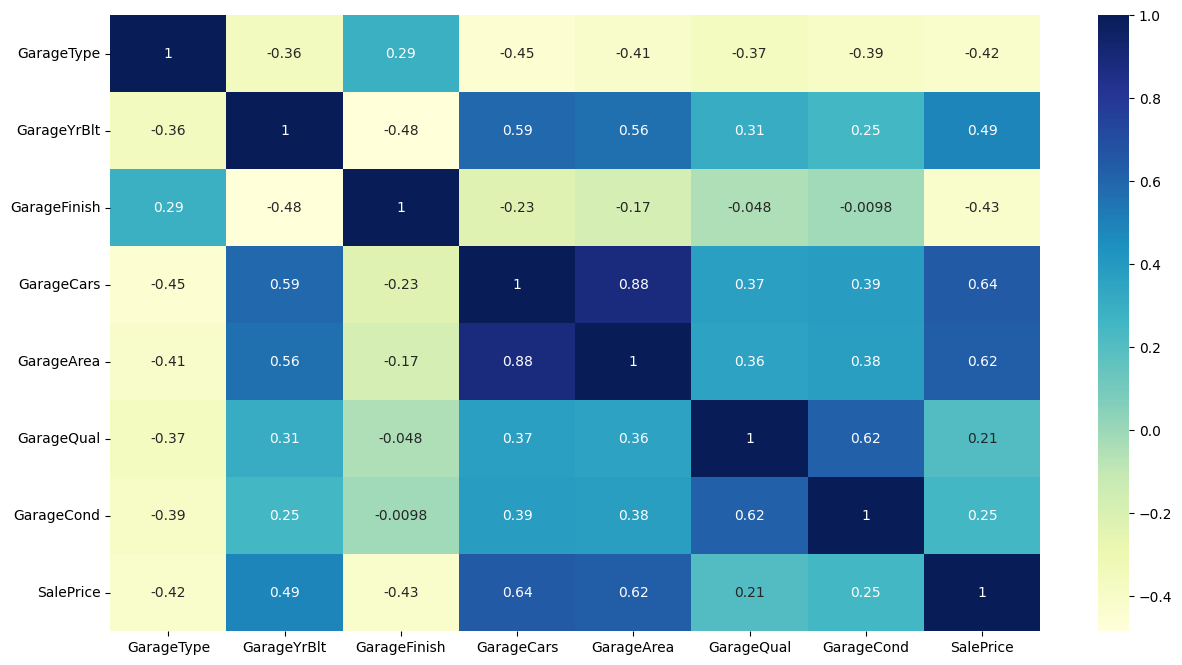

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.heatmap(train_data[corr_ccolumns].corr(),annot=True, cmap='YlGnBu')
plt.show()

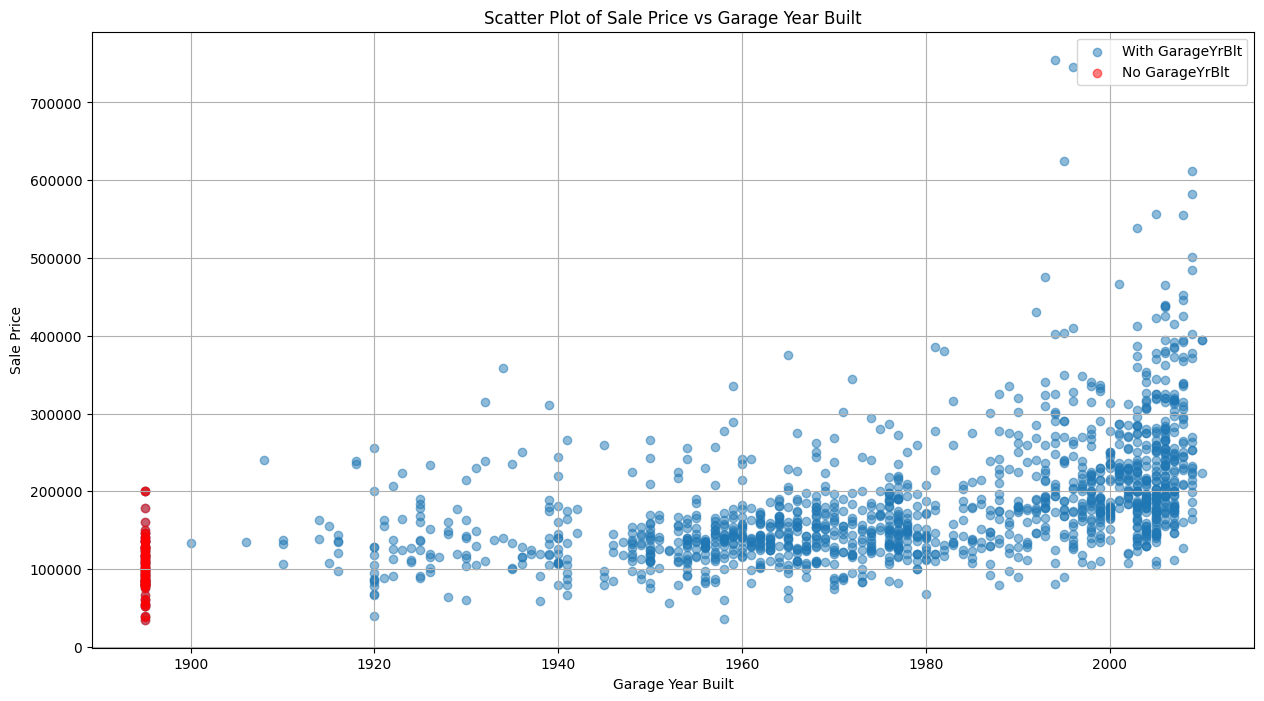

In [88]:
train_data['GarageYrBlt_filled'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].min()-5)
plt.figure(figsize=(15, 8))
plt.scatter(train_data['GarageYrBlt_filled'], train_data['SalePrice'], alpha=0.5, label='With GarageYrBlt')
houses_no_garageyrblt = train_data[train_data['GarageYrBlt'].isnull()]
plt.scatter(houses_no_garageyrblt['GarageYrBlt_filled'], houses_no_garageyrblt['SalePrice'], alpha=0.5, color='red', label='No GarageYrBlt')

plt.title('Scatter Plot of Sale Price vs Garage Year Built')
plt.xlabel('Garage Year Built')
plt.ylabel('Sale Price')
plt.legend()
plt.grid(True)
plt.show()

In [89]:
# Select the first 50 rows where 'GarageYrBlt' is null and print the specified garage columns
null_GarageYrBlt_data = train_data[train_data['GarageYrBlt'].isnull()][garage_columns].head(50)
#print(null_GarageYrBlt_data)

# Check if for every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6
all_GarageType_6 = null_GarageYrBlt_data['GarageType'].all() == 6
print("For every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6:", all_GarageType_6)

For every NaN value of 'GarageYrBlt', 'GarageType' has a value of 6: False


In [90]:
# Drop the 'GarageYrBlt' column
train_data.drop(columns='GarageYrBlt', inplace=True)

In [91]:
print(train_data.shape)

(1460, 80)


In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extract the 'SalePrice' column
sale_price = train_data['SalePrice']

# Remove the 'SalePrice' column from the dataset
data_without_sale_price = train_data.drop(columns=['SalePrice'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_without_sale_price)

# Initialize PCA
pca = PCA()

# Fit PCA to the standardized data
pca.fit(scaled_data)

# Transform the data to the new PCA space
pca_data = pca.transform(scaled_data)

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [1.34818554e-01 5.21137206e-02 4.75406742e-02 3.87056822e-02
 3.17244857e-02 2.76050789e-02 2.47449190e-02 2.31331708e-02
 2.14035683e-02 2.01511970e-02 1.97191463e-02 1.86331000e-02
 1.82055074e-02 1.72872807e-02 1.69668596e-02 1.65078800e-02
 1.55068752e-02 1.52529269e-02 1.51070159e-02 1.46229426e-02
 1.44340015e-02 1.38572657e-02 1.36583920e-02 1.30720507e-02
 1.28807283e-02 1.27726537e-02 1.24258711e-02 1.20386929e-02
 1.17867679e-02 1.16450133e-02 1.12802194e-02 1.10733292e-02
 1.06695461e-02 1.03315580e-02 1.02421398e-02 1.00492719e-02
 9.82711021e-03 9.54422838e-03 9.40913477e-03 9.36465681e-03
 8.91262025e-03 8.46388283e-03 8.22781291e-03 8.19234022e-03
 7.84539677e-03 7.63680048e-03 7.62705490e-03 7.40967346e-03
 7.00105916e-03 6.87790912e-03 6.66821757e-03 6.59600988e-03
 6.35171425e-03 6.01422600e-03 5.59930654e-03 5.46676881e-03
 5.33462526e-03 5.04086728e-03 4.83882661e-03 4.82694508e-03
 4.76192049e-03 4.12343891e-03 4.06938424e-03 3.94969112e-0

In [93]:
threshold = 0.01

# Find the indices of columns with explained variance ratio less than the threshold
irrelevant_columns_indices = np.where(pca.explained_variance_ratio_ < threshold)[0]

# Get the names of the irrelevant columns
irrelevant_columns = train_data.columns[irrelevant_columns_indices]

# Drop the irrelevant columns from the dataset
train_data_filtered = train_data.drop(columns=irrelevant_columns)

# Print the updated DataFrame
print(train_data_filtered.head())

   MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0          60         3         65.0     8450       1      1         3   
1          20         3         80.0     9600       1      1         3   
2          60         3         68.0    11250       1      1         0   
3          70         3         60.0     9550       1      1         0   
4          60         3         84.0    14260       1      1         0   

   LandContour  Utilities  LotConfig  ...  ExterCond  Foundation  BsmtQual  \
0            3          0          4  ...          4           2         2   
1            3          0          2  ...          4           1         2   
2            3          0          4  ...          4           2         2   
3            3          0          0  ...          4           0         4   
4            3          0          2  ...          4           2         2   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0    

In [94]:
train_data_filtered.shape

(1460, 37)

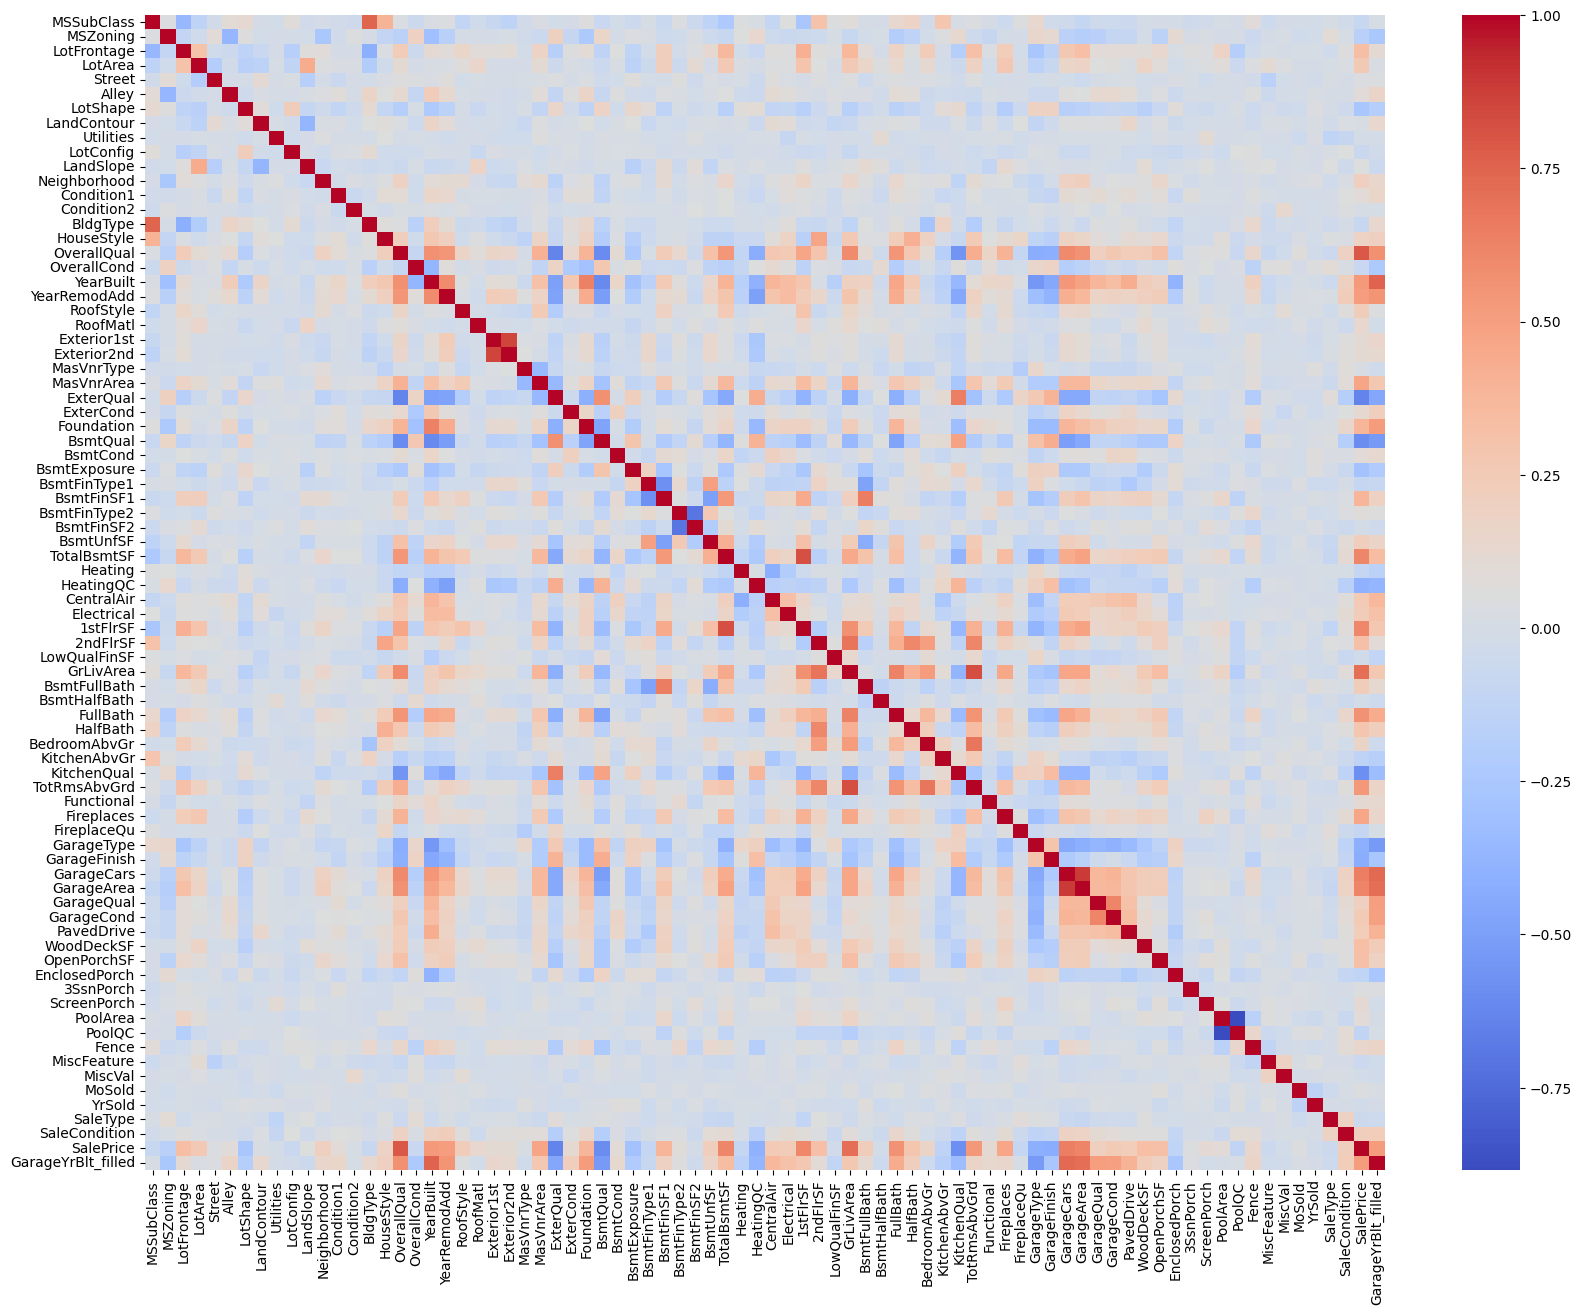

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.show()

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

X = train_data_filtered
y = train_data['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grids for GridSearchCV with 4-fold cross-validation
param_grids = {
    "GradientBoosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "RandomForest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 4, 5]
    },
    "SVM": {
        "kernel": ['linear', 'rbf'],
        "C": [0.1, 1, 10],
        "gamma": ['scale', 'auto']
    },
    "LinearRegression": {
        "fit_intercept": [True, False],
        "positive": [True, False]
    },
    "XGBoost": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.05, 0.1, 0.2],
        "max_depth": [3, 4, 5]
    },
    "Stacking": {
        "final_estimator": [GradientBoostingRegressor(), RandomForestRegressor()],
        "passthrough": [False, True]
    }
}

best_params = {}

predictions = {}

# Models dictionary
models_dict = {
    "GradientBoosting": GradientBoostingRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVM": SVR(),
    "LinearRegression": LinearRegression(),
    "XGBoost": XGBRegressor(),
    "Stacking": StackingRegressor(estimators=[
        ("gradient_boosting", GradientBoostingRegressor()),
        ("random_forest", RandomForestRegressor())
    ])
}

In [96]:
# Perform GridSearchCV for each model and store best parameters
for model_name, model in models_dict.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=4)
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {best_params[model_name]}")

    # Train model with best parameters and store predictions
    model.set_params(**grid_search.best_params_)
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

    # Print evaluation metrics
    y_pred = predictions[model_name]
    print(f"RMSE for {model_name}: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"MAE for {model_name}: {mean_absolute_error(y_test, y_pred):.2f}")

Best parameters for GradientBoosting: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}
RMSE for GradientBoosting: 33721.10
MAE for GradientBoosting: 21904.79
Best parameters for RandomForest: {'max_depth': 5, 'n_estimators': 100}
RMSE for RandomForest: 38198.05
MAE for RandomForest: 24858.21
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
RMSE for SVM: 51293.03
MAE for SVM: 31483.60
Best parameters for LinearRegression: {'fit_intercept': True, 'positive': False}
RMSE for LinearRegression: 40614.54
MAE for LinearRegression: 27432.00
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
RMSE for XGBoost: 32384.09
MAE for XGBoost: 20890.54
Best parameters for Stacking: {'final_estimator': GradientBoostingRegressor(), 'passthrough': False}
RMSE for Stacking: 47461.32
MAE for Stacking: 22687.31


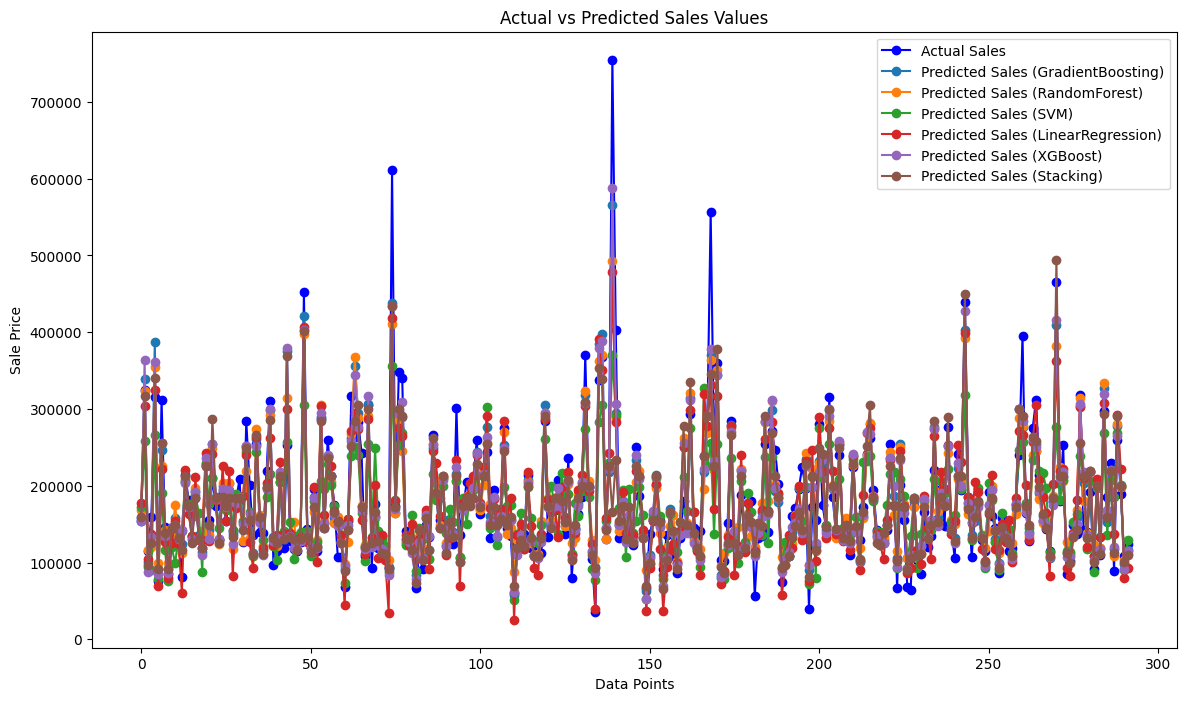

In [98]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for all models
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(y_test.values, label='Actual Sales', linestyle='-', marker='o', color='blue')

# Plot predictions for each model
for model_name, y_pred in predictions.items():
    plt.plot(y_pred, label=f'Predicted Sales ({model_name})', linestyle='-', marker='o')

plt.xlabel('Data Points')
plt.ylabel('Sale Price')
plt.title('Actual vs Predicted Sales Values')
plt.legend()
plt.show()

In [102]:
# Recalculate RMSE and MAE values
rmse_values = {model_name: np.sqrt(mean_squared_error(y_test, predictions[model_name])) for model_name in predictions}
mae_values = {model_name: mean_absolute_error(y_test, predictions[model_name]) for model_name in predictions}

# Print models with their RMSE in ascending order
sorted_rmse = sorted(rmse_values.items(), key=lambda item: item[1])
print("\nModels ranked by RMSE (best to worst):")
for model_name, rmse in sorted_rmse:
    print(f"{model_name}: RMSE = {rmse:.2f}")

# Print models with their MAE in ascending order
sorted_mae = sorted(mae_values.items(), key=lambda item: item[1])
print("\nModels ranked by MAE (best to worst):")
for model_name, mae in sorted_mae:
    print(f"{model_name}: MAE = {mae:.2f}")


Models ranked by RMSE (best to worst):
XGBoost: RMSE = 32384.09
GradientBoosting: RMSE = 33721.10
RandomForest: RMSE = 38198.05
LinearRegression: RMSE = 40614.54
Stacking: RMSE = 47461.32
SVM: RMSE = 51293.03

Models ranked by MAE (best to worst):
XGBoost: MAE = 20890.54
GradientBoosting: MAE = 21904.79
Stacking: MAE = 22687.31
RandomForest: MAE = 24858.21
LinearRegression: MAE = 27432.00
SVM: MAE = 31483.60


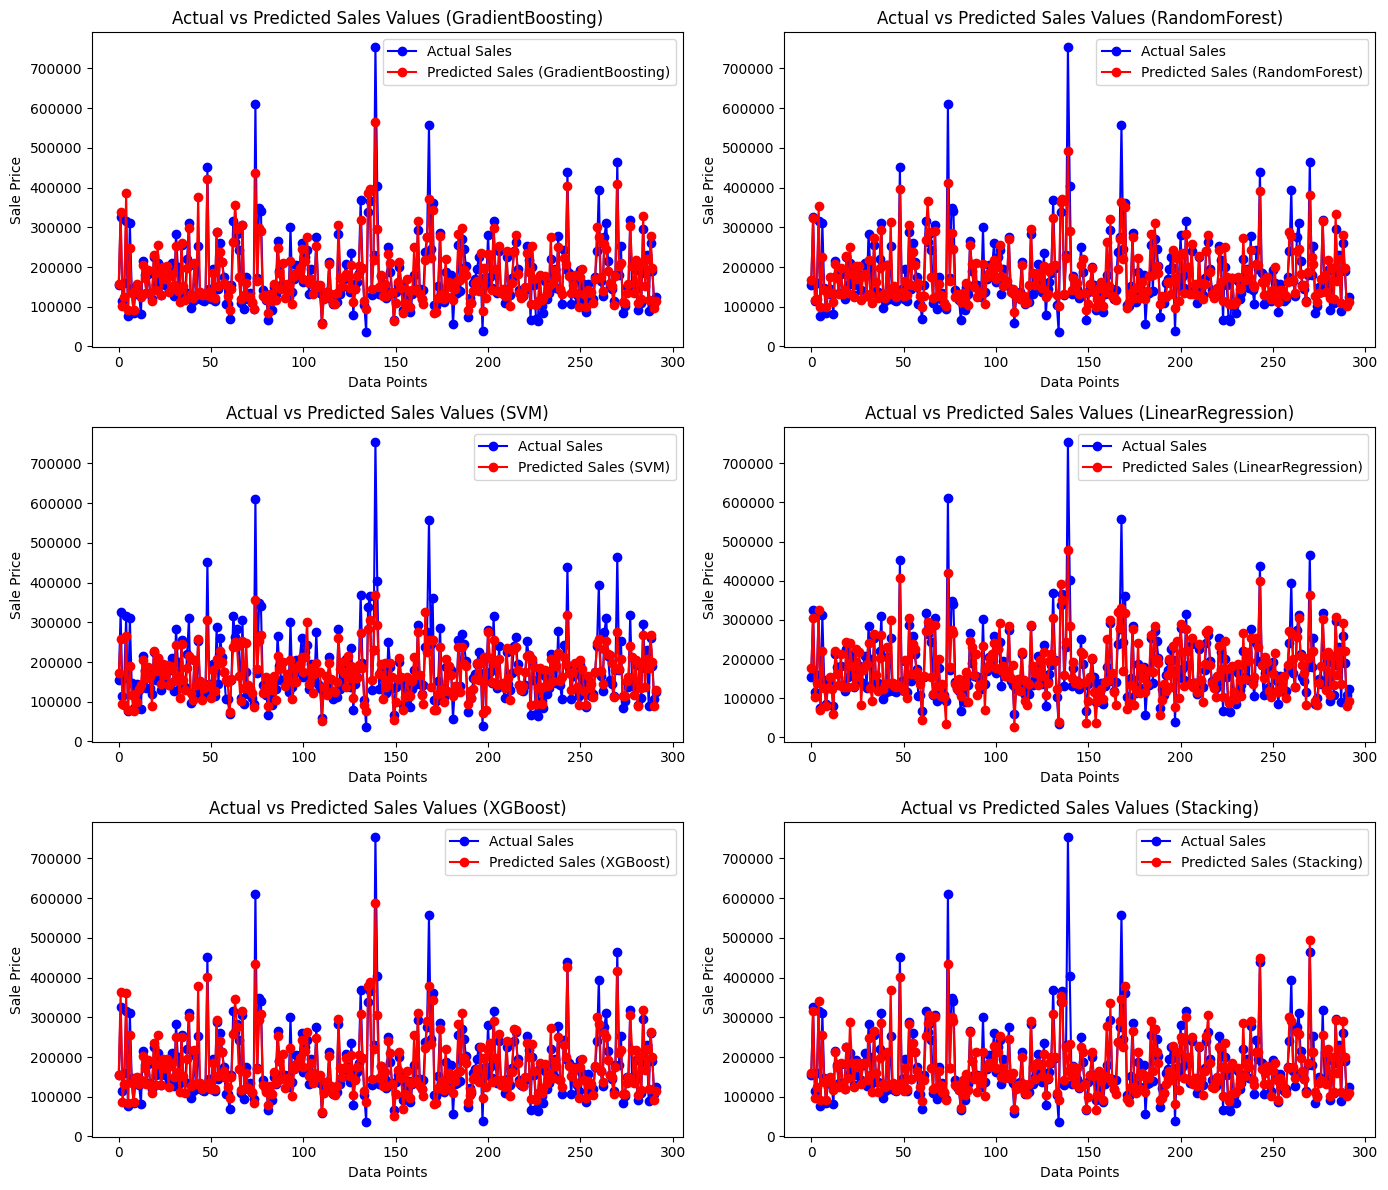

In [103]:
import matplotlib.pyplot as plt

num_models = len(predictions)
num_rows = 3
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 12))

for i, (model_name, y_pred) in enumerate(predictions.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.plot(y_test.values, label='Actual Sales', linestyle='-', marker='o', color='blue')
    ax.plot(y_pred, label=f'Predicted Sales ({model_name})', linestyle='-', marker='o', color='red')
    ax.set_xlabel('Data Points')
    ax.set_ylabel('Sale Price')
    ax.set_title(f'Actual vs Predicted Sales Values ({model_name})')
    ax.legend()

plt.tight_layout()
plt.show()